## Zápočtový úkol 1 – Lineární regrese

Zvolený dataset: https://archive.ics.uci.edu/dataset/360/air+quality

Má 9357 řádků a 15 sloupců. 
Obsahuje  data ze senzorů kvality ovzduší, shromážděných od března 2004 do února 2005.




In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = os.path.join(os.getcwd(),'AirQualityUCI.csv')

In [3]:
data = pd.read_csv(path, sep=';', decimal=',')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [19]:
data.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [5]:
data = data.drop(columns=['Date', 'Time','Unnamed: 15', 'Unnamed: 16'])
data = data.dropna()

In [8]:
# vstupni a vystupni promenna
input = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)']
output = 'CO(GT)'


In [9]:
X = data[input]
y = data[output]

In [10]:
# normalizace
X = (X - X.mean()) / X.std()

y = (y - y.mean()) / y.std()

print(X.head())
print(y.head())

   PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)
0     0.942932  0.242491       0.442273
1     0.736767  0.182075       0.176450
2     1.070270  0.172409       0.129712
3     0.991442  0.177242       0.156002
4     0.676130  0.111994      -0.171164
0    0.473975
1    0.466248
2    0.468824
3    0.468824
4    0.461097
Name: CO(GT), dtype: float64


In [11]:
# pridani sloupce jednicek
X.insert(0, 'Intercept', 1)

In [12]:
# konvertovani do numpy matice
X2 = np.matrix(X.values)
y2 = np.matrix(y.values).reshape(-1, 1)

In [13]:
# inicializace theta
theta2 = np.matrix(np.zeros(X2.shape[1]))

In [14]:
# nákladová fce
def computeCost(X, y, theta):
    inner = np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [15]:
# gradientní sestup
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
        
        theta = temp
        cost[i] = computeCost(X, y, theta)
    
    return theta, cost

In [16]:
alpha = 0.01  
iterations = 1000 

# provedeni regrese
theta_final, cost_history = gradientDescent(X2, y2, theta2, alpha, iterations)

In [17]:
# vycisleni nakladu (chyby) modelu
computeCost(X2, y2, theta_final)

0.49167465784967374

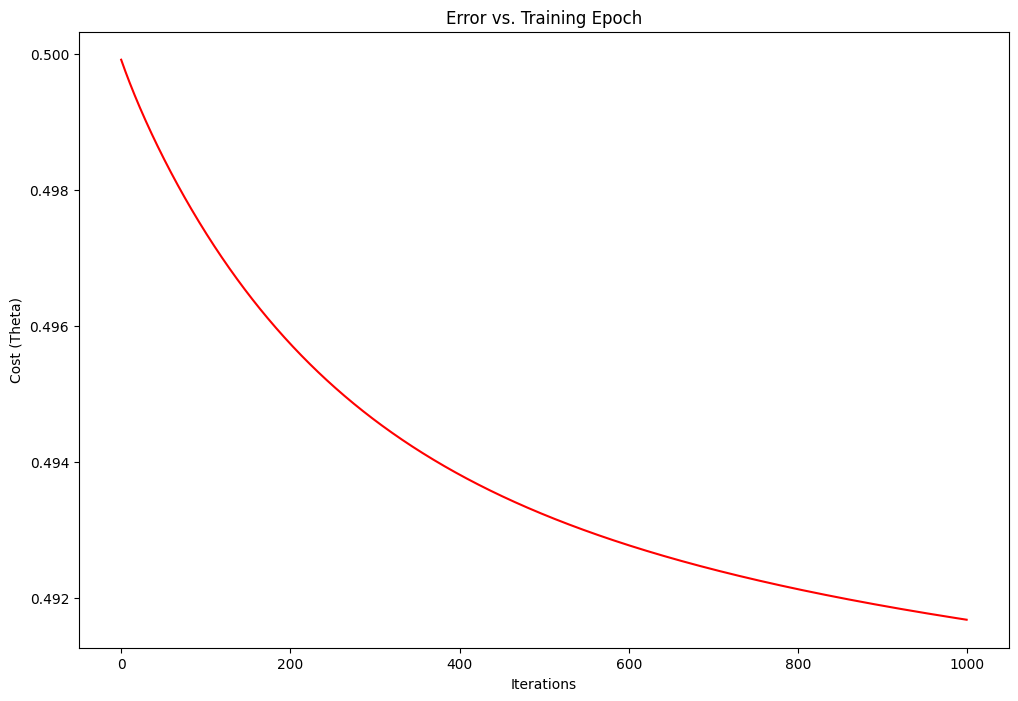

In [18]:
# vykresleni grafu
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iterations), cost_history, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost (Theta)')
ax.set_title('Error vs. Training Epoch')
plt.show()